# Import all the necessary libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read the distance matrix from the file

In [35]:
dist_matr = np.genfromtxt("dist_matr.csv",delimiter=",")
print(dist_matr)
print((dist_matr==dist_matr.T).all())

[[  0.  83.  93. 129. 133. 139. 151. 169. 135. 114. 110.  98.  99.  95.
   81. 152. 159. 181. 172. 185. 147. 157. 185. 220. 127. 181.]
 [ 83.   0.  40.  53.  62.  64.  91. 116.  93.  84.  95.  98.  89.  68.
   67. 127. 156. 175. 152. 165. 160. 180. 223. 268. 179. 197.]
 [ 93.  40.   0.  42.  42.  49.  59.  81.  54.  44.  58.  64.  54.  31.
   36.  86. 117. 135. 112. 125. 124. 147. 193. 241. 157. 161.]
 [129.  53.  42.   0.  11.  11.  46.  72.  65.  70.  88. 100.  89.  66.
   76. 102. 142. 156. 127. 139. 155. 180. 228. 278. 197. 190.]
 [133.  62.  42.  11.   0.   9.  35.  61.  55.  62.  82.  95.  84.  62.
   74.  93. 133. 146. 117. 128. 148. 173. 222. 272. 194. 182.]
 [139.  64.  49.  11.   9.   0.  39.  65.  63.  71.  90. 103.  92.  71.
   82. 100. 141. 153. 124. 135. 156. 181. 230. 280. 202. 190.]
 [151.  91.  59.  46.  35.  39.   0.  26.  34.  52.  71.  88.  77.  63.
   78.  66. 110. 119.  88.  98. 130. 156. 206. 257. 188. 160.]
 [169. 116.  81.  72.  61.  65.  26.   0.  37.  59.  75

# Function for Swapping two elements in x

In [36]:
def swap(x):
    x_len = len(x)
    sampled_idx = np.random.choice(len(x),2,replace=False)
    x[sampled_idx[0]],x[sampled_idx[1]] = x[sampled_idx[1]],x[sampled_idx[0]]
    return(x)

# Define the distance function

In [37]:
def dist_func(a,dist_matrix):
    i = 0
    total_distance = 0
    for j in range(len(a)):
        total_distance += dist_matrix[a[j]][i]
        #print(i,a[j])
        i=a[j]
    total_distance +=dist_matrix[i][0]
    return(total_distance)

# Randomly re-initialize points

In [38]:
def rrI(arr,popSize):
    re_init_pop = [] 
    for i in range(popSize):
        new_memb = np.random.permutation(arr)
        re_init_pop.append(new_memb)
    re_init_pop = np.matrix(re_init_pop)
    return(re_init_pop)

# Write code to obtain optimum path

In [39]:
def Optimum_path(path,dist_matrix,popSize,childNum,rrI_pop,maxIter):
    ## Create the initial population
    population = []
    for i in range(popSize):
        random_path = np.random.permutation(path)
        population.append(random_path)
    population = np.matrix(population)
    
    for t in range(maxIter):
        y_arr = []
        
        for i in range(population.shape[0]): ## Number of rows in same as popSize
            a = np.ravel(population[i,:])
            y = dist_func(a,dist_matrix)
            y_arr.append(y)
            
        u_arr = [y_arr[i] - min(y_arr) for i in range(len(y_arr))]
        fit_score = [u_arr[i]/sum(u_arr) for i in range(len(u_arr))]
        #print(fit_score)
        child_num = [int(fit_score[i]*childNum) for i in range(len(y_arr))]
        child_arr = []
        for i in range(len(y_arr)):
            x_i = np.ravel(population[i,:])
            for j in range(child_num[i]):
                c = swap(x_i)
                child_arr.append(c)
        #print(population)
        child_mat = np.matrix(child_arr)
        re_init_pop = rrI(path,rrI_pop)
#         print(re_init_pop.shape)
#         print(child_mat.shape)
#         print(population.shape)
        total_pop = np.vstack((child_mat,population,re_init_pop))

        fitness_arr = []
        
        for i in range(total_pop.shape[0]):
            b = np.ravel(total_pop[i,:])
            d1 = dist_func(b,dist_matrix)
            fitness_arr.append(d1)
        
        fitness_arr = np.array(fitness_arr)
        min_idx = np.argsort(fitness_arr)
        
        useful_idx = min_idx[:popSize]
        useful_dist = fitness_arr[useful_idx]
     
        min_dist_idx = useful_idx[0]
        best_memb = total_pop[min_dist_idx,:]
        best_dist = useful_dist[0] 
        
        print("Best path obtained till now is {}".format(best_memb))
        print("Best distance obtained till now is {}".format(best_dist))
        popList = []
        
        for i in range(len(useful_idx)):
            uidx = useful_idx[i]
            popMember = total_pop[uidx,:]
            popMember = np.ravel(popMember)
            popList.append(popMember)
        population = np.matrix(popList)

In [40]:
path = np.arange(1,26,1)
print(path)
Optimum_path(path,dist_matr,100,500,200,20)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Best path obtained till now is [[17 19 25 20 22 18 10 23 16  7  4 13 11 15  5  3  9 14 12  8  2  6  1 21
  24]]
Best distance obtained till now is 2119.0
Best path obtained till now is [[21  8  5  4  9  6 12 17 11  2  3  1 14 19 15 23 24 22 20 25 18 10 16  7
  13]]
Best distance obtained till now is 2032.0
Best path obtained till now is [[13 18 24 23 25 22 17 14  9 12  4  3  7 19 16  5  8 11 15  6 10 20 21  2
   1]]
Best distance obtained till now is 1960.0
Best path obtained till now is [[13 18 24 23 25 22 17 14  9 12  4  3  7 19 16  5  8 11 15  6 10 20 21  2
   1]]
Best distance obtained till now is 1960.0
Best path obtained till now is [[13 18 24 23 25 22 17 14  9 12  4  3  7 19 16  5  8 11 15  6 10 20 21  2
   1]]
Best distance obtained till now is 1960.0
Best path obtained till now is [[13 18 24 23 25 22 17 14  9 12  4  3  7 19 16  5  8 11 15  6 10 20 21  2
   1]]
Best distance obtained till now is 1960.

# Correct answer for this problem and the minimum distance

The minimum distance path is:
0->24->23->22->25->21->20->16->17->19->18->15->10->11->12->14->13->9->8->7->6->4->5->3->2->1->0
Minimum possible distance is: 937.0


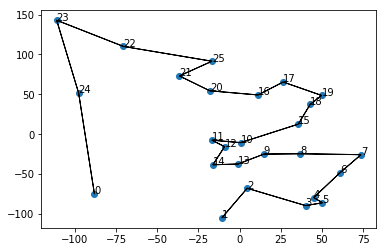

In [41]:
ans = np.array([24,23,22,25,21,20,16,17,19,18,15,10,11,12,14,13,9,8,7,6,4,5,3,2
  ,1])
print("The minimum distance path is:")
print(str(0)+"->",end="")
for i in range(len(ans)):
    print(str(ans[i])+"->",end = "")
print(0)
print("Minimum possible distance is: {}".format(dist_func(ans,dist_matr)))


from sklearn.manifold import MDS #Multi dimensional scaling
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(dist_matr)
n = np.arange(26)
x = out[:, 0]
y = out[:, 1]
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.arrow(x[0],y[0],x[ans[0]]-x[0],y[ans[0]]-y[0])
for i, txt in enumerate(n):
    if(i<24):
        ax.arrow(x[ans[i]],y[ans[i]],x[ans[i+1]]-x[ans[i]],y[ans[i+1]]-y[ans[i]])
    ax.annotate(txt, (x[i], y[i]))